In [33]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('lending_club_loan_two.csv')
data.drop(['address','title','emp_title','issue_d'],axis=1,inplace=True)


In [35]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [36]:
data.skew()

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                  16.576564
revol_bal                11.727515
revol_util               -0.071778
total_acc                 0.864328
mort_acc                  1.600132
pub_rec_bankruptcies      3.423440
dtype: float64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [38]:
data.isna().sum() 


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [39]:
data = data.dropna()

In [40]:
#data['emp_length'].fillna(data['emp_length'].mode()[0], inplace=True)
#data['revol_util'].fillna(data['revol_util'].mode()[0], inplace=True)
#data['mort_acc'].fillna(data['mort_acc'].mode()[0], inplace=True)
#data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0], inplace=True)




<AxesSubplot: >

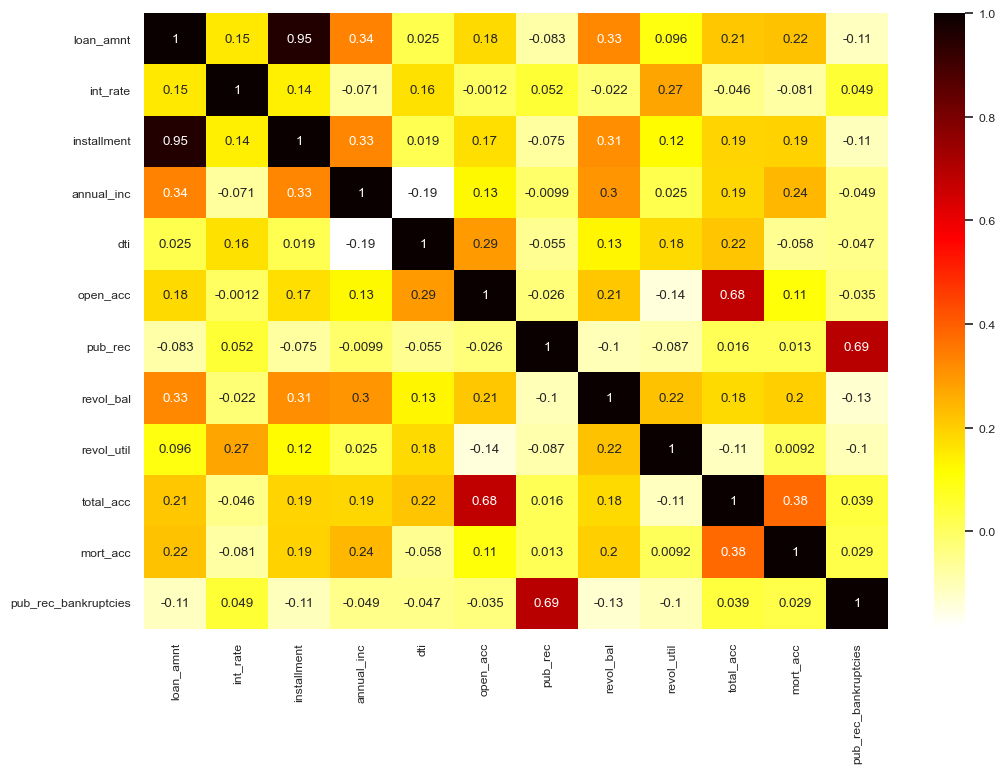

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True,cmap="hot_r")

In [42]:
#df_fillin = data.copy()
#df_fillin = df_fillin.select_dtypes(include='number')
#for j in df_fillin.columns:
    #q1 = df_fillin[j].quantile(0.25)
    #q3 = df_fillin[j].quantile(0.75)
    #iqr = q3 - q1 
    #lower_fence  = q1-1.5*iqr
    #higher_fence = q3+1.5*iqr
    #for i in range(len(df_fillin)):
        #if data.loc[i,j] < lower_fence:
            #df_fillin.loc[i,j] = lower_fence
        #elif data.loc[i,j] > higher_fence:
            #df_fillin.loc[i,j] = higher_fence
        #else:
            #df_fillin.loc[i,j] = df_fillin.loc[i,j]

[Text(0.5, 0, 'int_rate'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Interest Rate')]

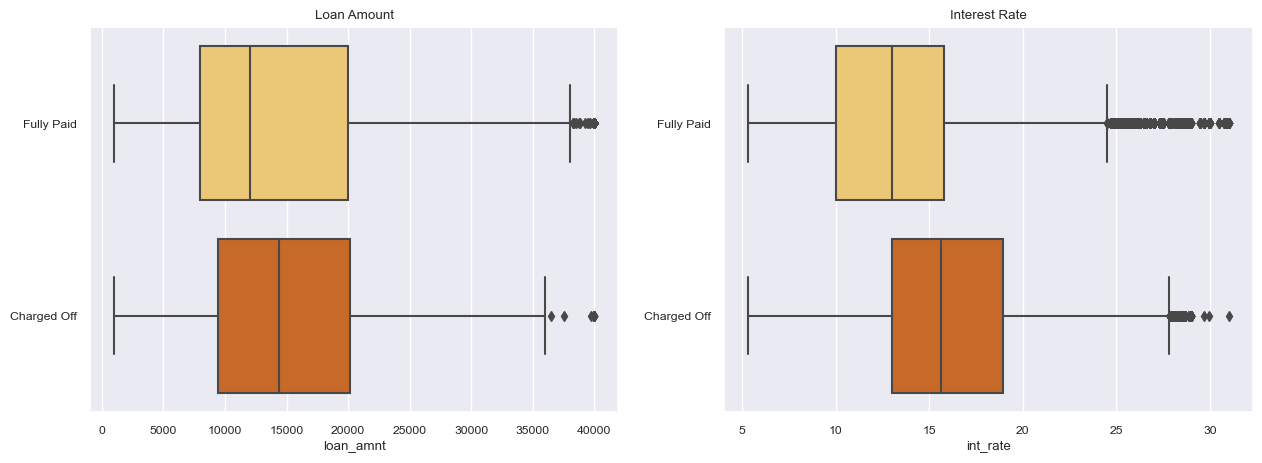

In [43]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes = axes.flatten()
sns.boxplot(ax=axes[0],x='loan_amnt',y='loan_status',data=data,palette="YlOrBr").set(
    xlabel='loan_amnt',ylabel="",title="Loan Amount")
sns.boxplot(ax = axes[1],x='int_rate',y='loan_status',data=data,palette="YlOrBr").set(
    xlabel="int_rate",ylabel="",title="Interest Rate")


[Text(0.5, 0, 'Sub Grade'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Sub Grade Distribution')]

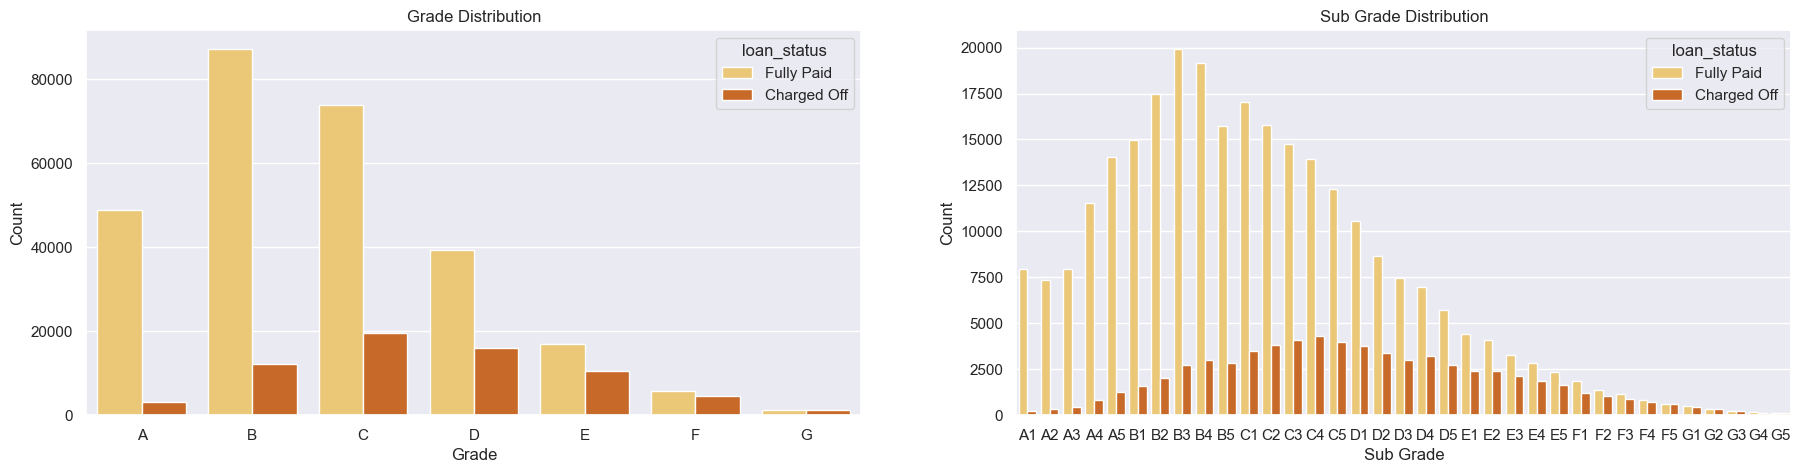

In [44]:
sns.set(font_scale=1) 
fig, axes = plt.subplots(1,2,figsize=(22,5))
axes = axes.flatten()
g_order = ['A','B','C','D','E','F','G']
sub_order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
sns.countplot(ax = axes[0],data=data, hue='loan_status',x = 'grade',order=g_order, palette="YlOrBr").set(
    xlabel='Grade',ylabel="Count",title="Grade Distribution")
sns.countplot(ax = axes[1],data=data, hue='loan_status',x = 'sub_grade',order=sub_order, palette="YlOrBr").set(
    xlabel='Sub Grade',ylabel="Count",title="Sub Grade Distribution")



[Text(0.5, 0, 'Home ownership'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Home ownership Distribution')]

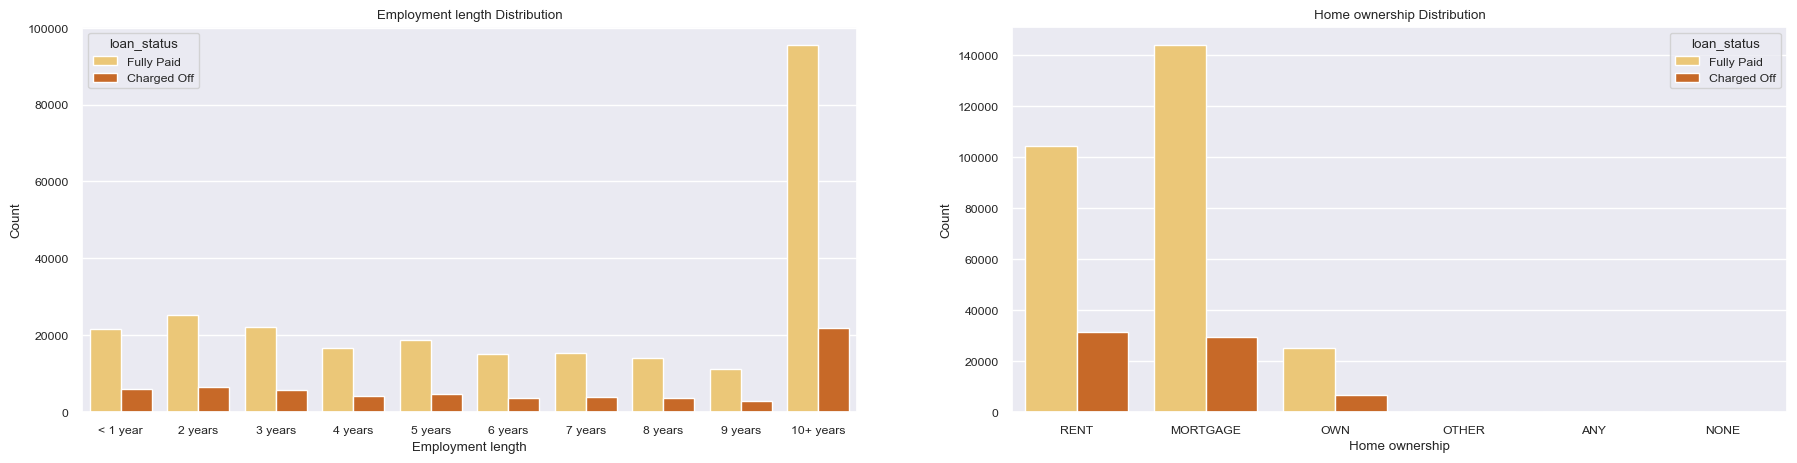

In [45]:
sns.set(font_scale=0.8) 
fig, axes = plt.subplots(1,2,figsize=(22,5))
axes = axes.flatten()
y_order = ['< 1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(ax = axes[0],data=data, x="emp_length", hue="loan_status",palette="YlOrBr",order=y_order).set(
    xlabel='Employment length',ylabel="Count",title="Employment length Distribution")
sns.countplot(ax = axes[1],data=data, x="home_ownership", hue="loan_status",palette="YlOrBr").set(
    xlabel='Home ownership',ylabel="Count",title="Home ownership Distribution")

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Payments on the loan')]

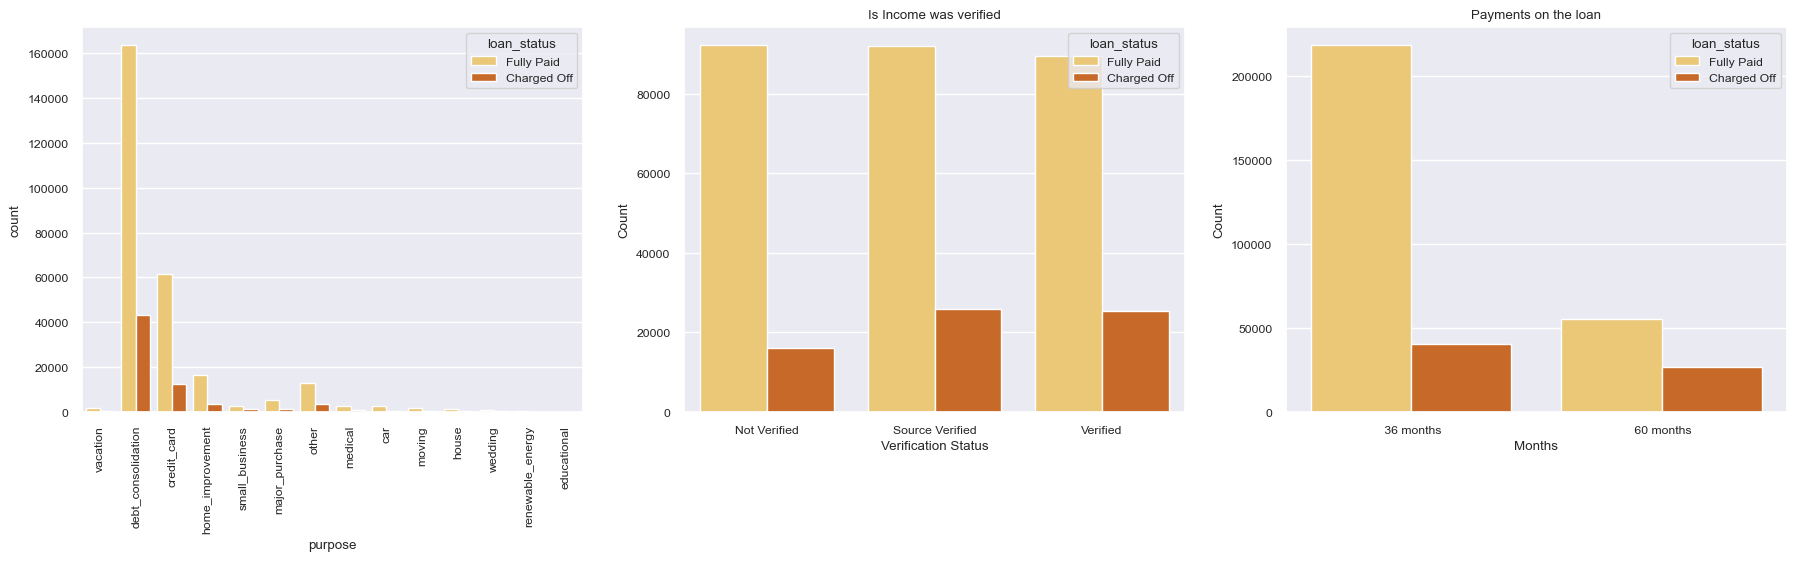

In [46]:
sns.set(font_scale=0.8) 
fig, axes = plt.subplots(1,3,figsize=(22,5))
axes = axes.flatten()
sns.countplot(ax = axes[0],data=data, x="purpose", hue="loan_status",palette="YlOrBr").tick_params(axis='x', labelrotation=90)
sns.countplot(ax = axes[1],data=data, x="verification_status", hue="loan_status",palette="YlOrBr").set(
    xlabel='Verification Status',ylabel="Count",title="Is Income was verified")
sns.countplot(ax = axes[2],data=data, x="term", hue="loan_status",palette="YlOrBr").set(
    xlabel='Months',ylabel="Count",title="Payments on the loan")

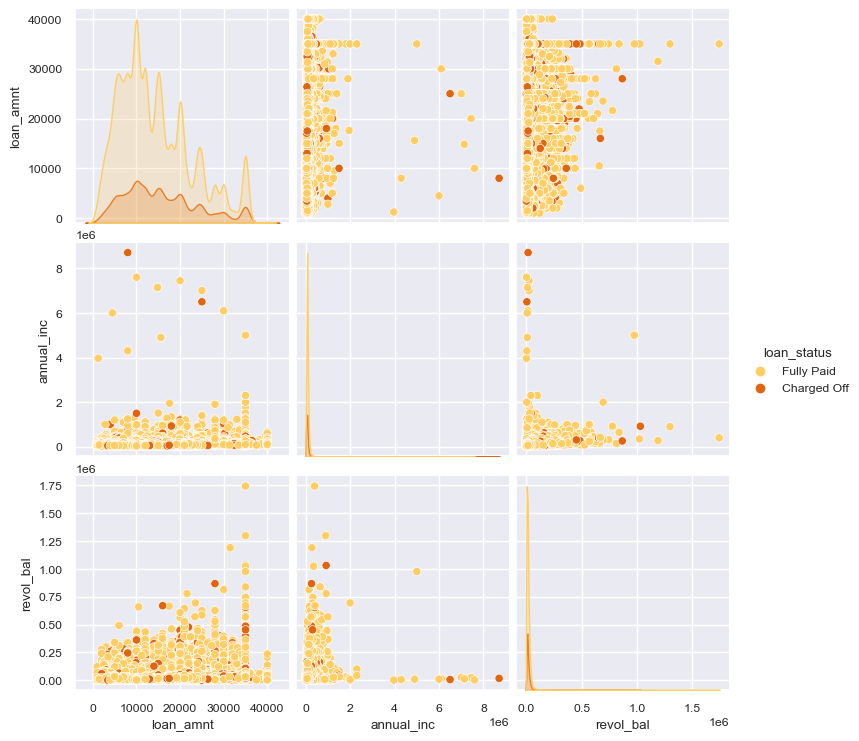

In [47]:
dataPair = data.loc[:,['loan_status','loan_amnt','annual_inc','revol_bal']]
sns.pairplot(dataPair,hue="loan_status",palette="YlOrBr")

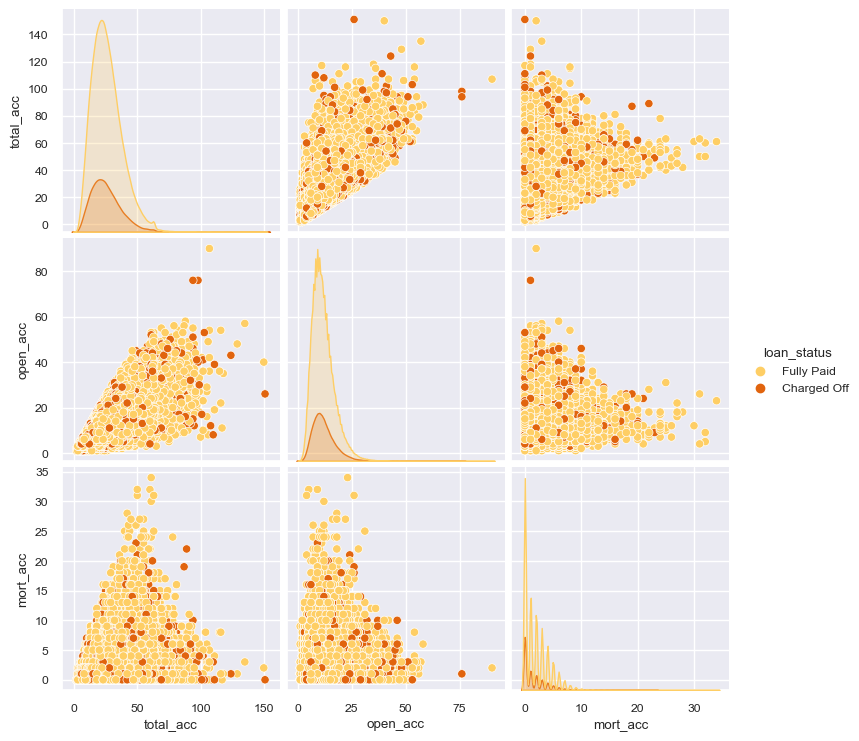

In [48]:
dataPair = data.loc[:,['loan_status','total_acc','open_acc','mort_acc']]
sns.pairplot(dataPair,hue="loan_status",palette="YlOrBr")

In [49]:
data = data.sample(n=60000)
test = data.drop(['sub_grade'],axis=1)
X=test.drop(['grade'],axis=1)
y=test['grade']
X = X.apply(LabelEncoder().fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns)



Text(0.5, 1.0, 'ANOVA P value')

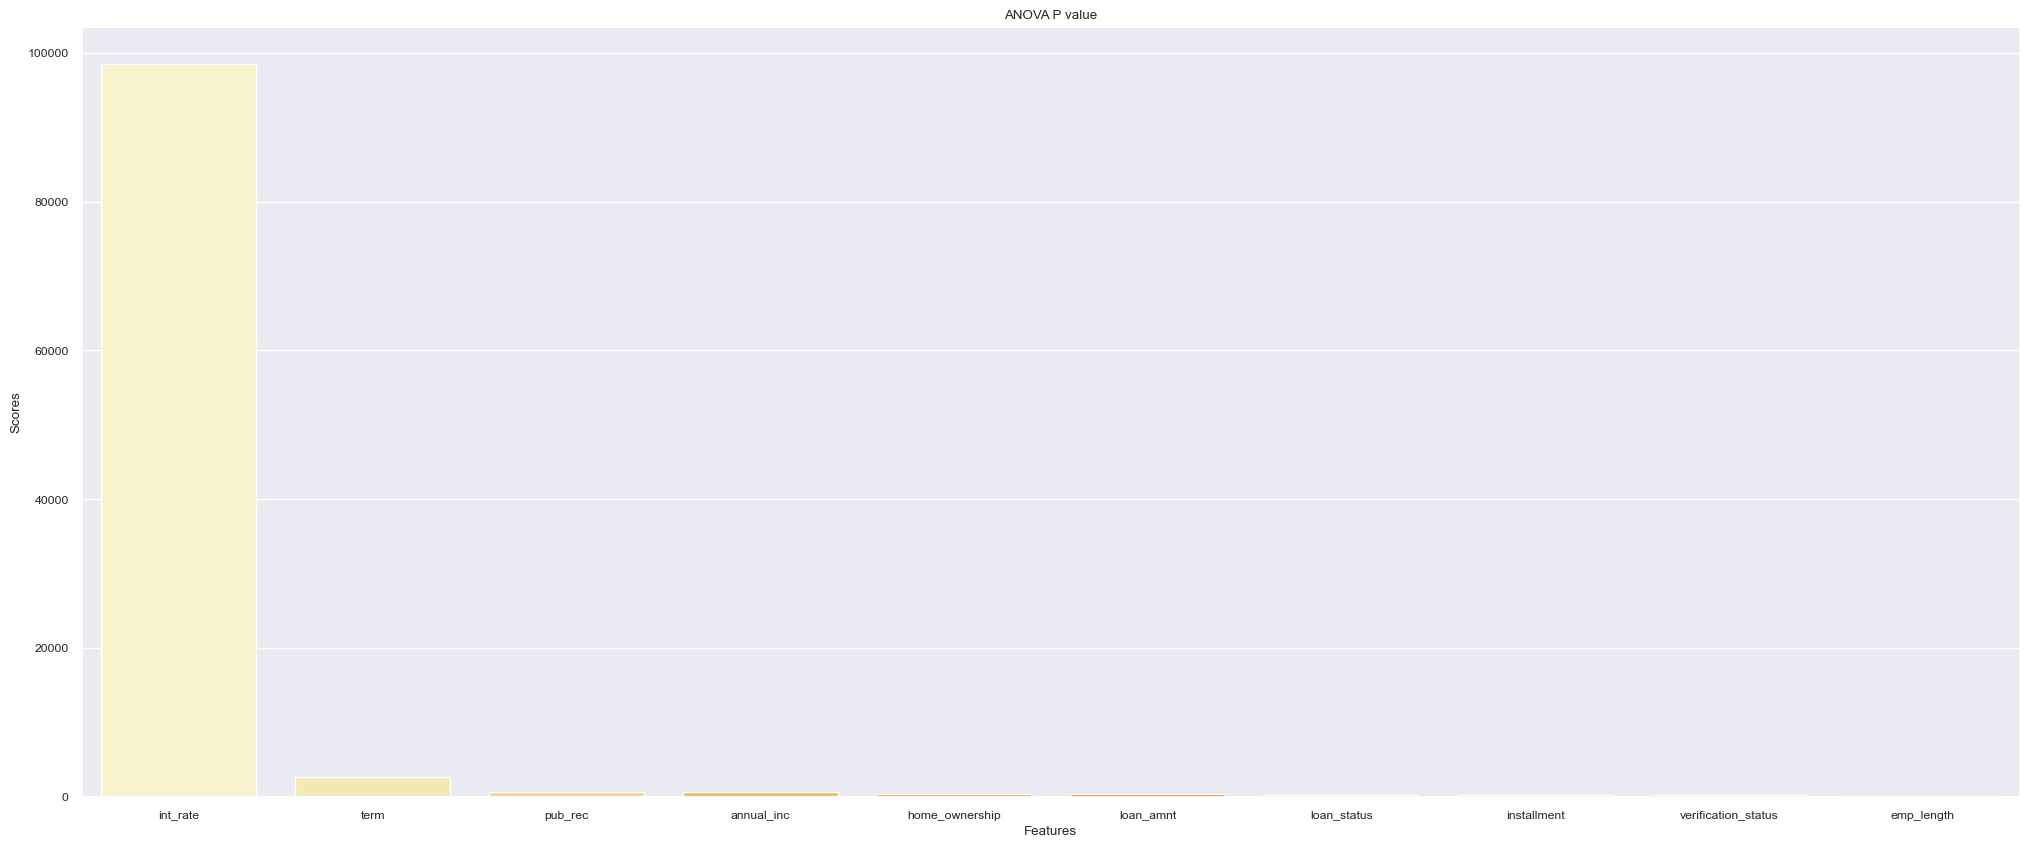

In [50]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
features_list = []
scores_list = []
for i in range(len(fs.scores_)):
 features_list.append(data.columns[i])
 scores_list.append(fs.scores_[i])
df_features = pd.DataFrame({'Features': features_list, 'Scores': scores_list})
df_features = df_features.sort_values(by=['Scores'],ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='Features', y='Scores', data=df_features[0:10],palette="YlOrBr")
plt.title("ANOVA P value")

In [51]:
X_train

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,0.200000,0.0,-0.547945,0.274373,0.0,1.0,0.136986,-0.5,0.0,-1.0,...,-0.274924,2.666667,0.0,0.709817,-0.551247,1.4375,0.0,0.0,-0.333333,0.0
1,1.675000,0.0,0.013699,1.148183,-0.2,0.0,1.021171,0.0,-1.0,-1.0,...,-0.595166,1.833333,0.0,1.408940,0.263158,1.1875,0.0,0.0,1.333333,0.0
2,0.450000,1.0,-0.027397,0.068821,-0.2,1.0,0.339975,0.0,-1.0,0.0,...,0.114804,-0.166667,0.0,0.630142,0.038781,-0.3750,1.0,0.0,-0.333333,0.0
3,0.116667,1.0,-0.287671,-0.282419,-0.4,1.0,0.690743,0.0,0.0,-1.0,...,-0.716012,-0.666667,0.0,1.242630,0.606648,0.1250,0.0,0.0,-0.333333,0.0
4,-0.591667,0.0,-0.589041,-0.709401,1.0,1.0,-0.956829,-0.5,-1.0,-1.0,...,-0.685801,-1.166667,0.0,-0.772802,0.487535,-0.9375,1.0,0.0,-0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.033333,0.0,-0.986301,0.032238,-0.2,0.0,0.657119,0.0,0.0,0.0,...,-0.697885,-1.000000,0.0,-0.448232,-0.684211,-0.5625,1.0,0.0,0.666667,0.0
53996,0.768750,1.0,0.712329,0.469733,0.0,1.0,-0.418846,0.0,-1.0,0.0,...,-0.438066,0.333333,0.0,0.842915,0.423823,-0.2500,0.0,0.0,-0.333333,0.0
53997,-0.685417,0.0,-0.438356,-0.795977,0.4,1.0,-0.956829,0.5,-1.0,1.0,...,0.314199,-0.666667,0.0,-0.591227,-0.922438,-0.8125,1.0,0.0,-0.333333,0.0
53998,-0.383333,0.0,-0.698630,-0.487649,0.0,1.0,-0.892902,0.0,0.0,-1.0,...,-0.595166,-1.000000,1.0,0.028473,-0.390582,-1.1250,1.0,0.0,-0.333333,1.0


In [52]:
df_features['Features'][0:10]

2                int_rate
1                    term
15                pub_rec
8              annual_inc
7          home_ownership
0               loan_amnt
10            loan_status
3             installment
9     verification_status
6              emp_length
Name: Features, dtype: object

In [53]:
X=data.loc[:,['int_rate','term','revol_bal','verification_status','annual_inc','loan_amnt','purpose',
'installment','loan_status','home_ownership']]
y=data['grade']
X = X.apply(LabelEncoder().fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
Runtime = []

In [54]:
start = time.time()

logr = LogisticRegression()
param_grid_logr = [
    {'penalty':['l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,10,100],
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'multi_class':['auto','ovr','multinomial'],
    'class_weight':['balanced']
    }
]
param_logr = GridSearchCV(logr, param_grid = param_grid_logr, cv = 3, verbose=True,scoring='accuracy')
best_param_logr = param_logr.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for logistic regression",best_param_logr.best_params_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
The best parameters for logistic regression {'C': 1, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


In [55]:
logr = LogisticRegression(C = 1 ,multi_class='auto',penalty='l2',solver='newton-cg',class_weight='balanced')
logr.fit(X_train,y_train)
logr_Prediction = logr.predict(X_test)
Accuracy_Logistic = accuracy_score(y_test,logr_Prediction)
print("The accuracy score of logisitc regression for grade is:",Accuracy_Logistic)
model_list = ['Logistic Regression']
accuracy_list = [Accuracy_Logistic]
df_models = pd.DataFrame({'Machine Learning Models': model_list, 'Accuracy': accuracy_list, 'Training Time (s)': Runtime})
df_models

The accuracy score of logisitc regression for grade is: 0.7963333333333333
